# Analysis with Seaborn

In [19]:
%matplotlib inline

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set(style="darkgrid", context="poster")

### Setting up the Data

In [22]:
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

Note that unlike many other seaborn functions, heatmap() expects the input data to be a table of values with one variable in the rows and one variable in the columns. Your dataset may be in tidy format, as with the flights example.

### Prepare the Data

In [23]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Fortunately, it’s easy to pivot a dataframe out into rectangular format. 

In [24]:
flights_rect = flights.pivot("month", "year", "passengers")
flights_rect = flights_rect.ix[flights.month.iloc[:12]]

In [25]:
flights_rect.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


## Heatmap

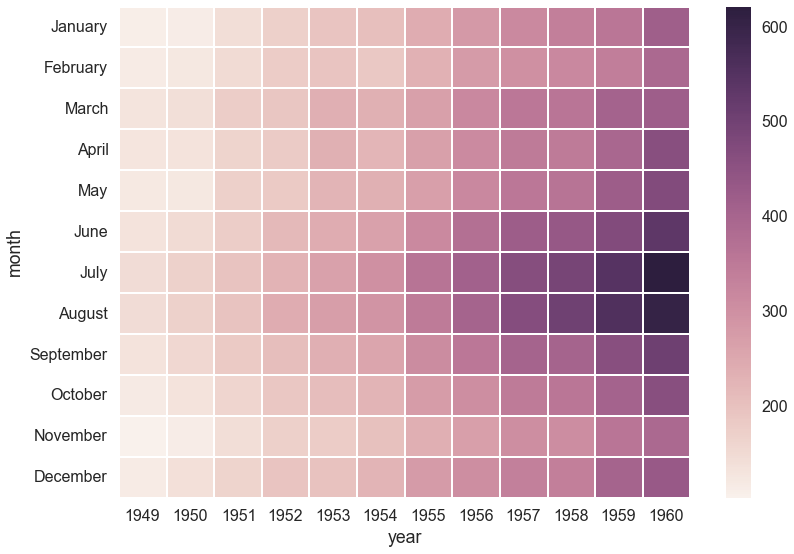

In [26]:
sns.heatmap(flights_rect);

If you do particularly care about the precise numeric values, you can annotate each cell.

### Centering your Heatmap

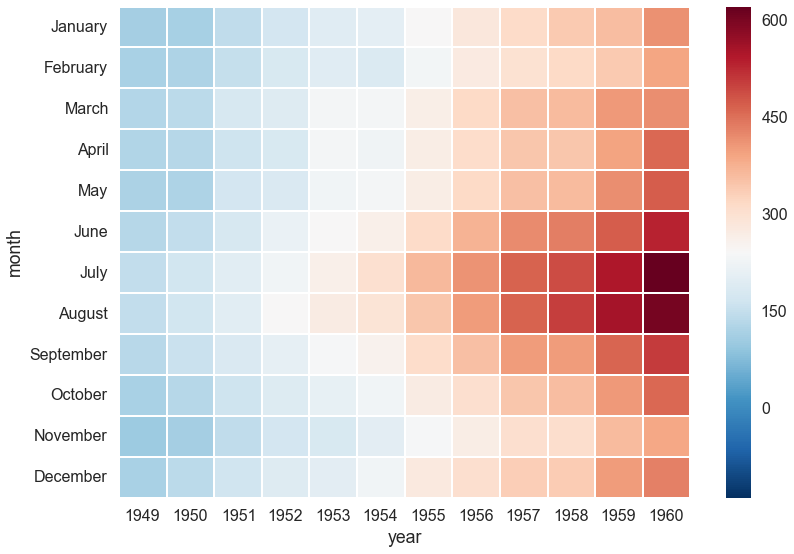

In [27]:
sns.heatmap(flights_rect, center=flights_rect.loc["January", 1955]);

### Clustermap

Beyond the heatmap(), you may also be curious how the rows and columns of your rectangular dataset are related to each other. Enter the clustermap(), which will reorganize the heatmap so that similar entries on the rows and columns are plotted closer together. This can help you discover structure in the dataset.

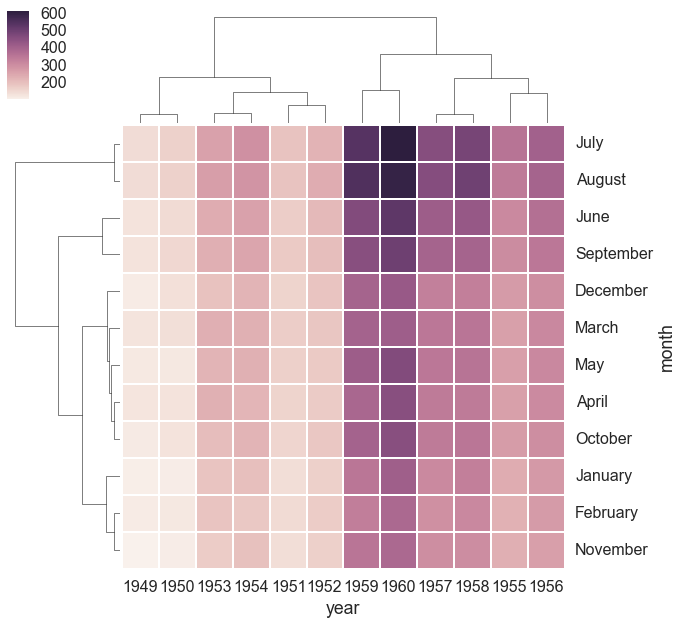

In [28]:
cg = sns.clustermap(flights_rect)

This is a little skewed because the number of flights increase by year, so let’s standard_scale the data (i.e. divide all the columns by the maximum so we can compare year-to-year on the same scale). We provide 1 to indicate that we want to standard scale the columns, but we could also scale the rows, as in the next example.

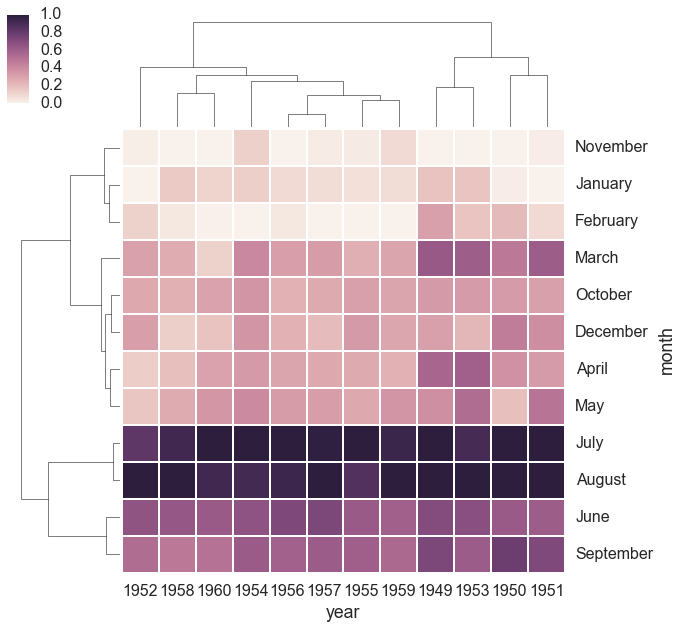

In [29]:
cg = sns.clustermap(flights_rect, standard_scale=1)

You could also scale the rows by setting standard_scale=0, to see how the different years cluster together if all the months are normalized across all years.

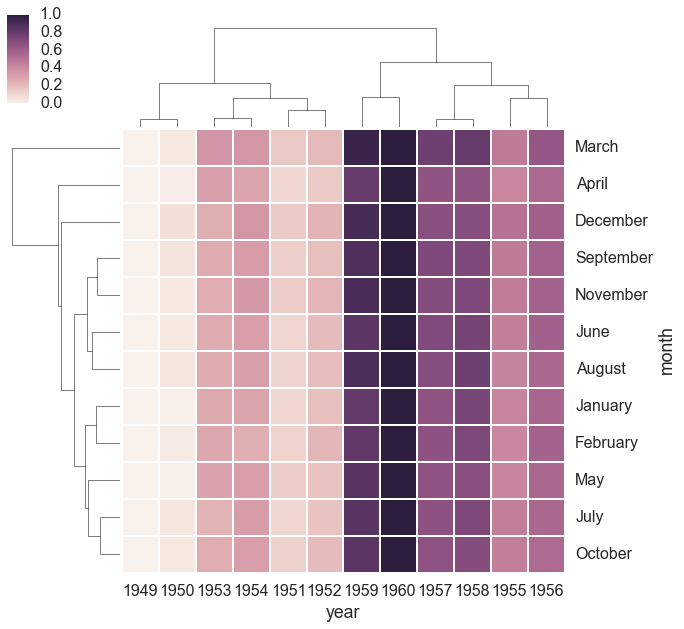

In [30]:
cg = sns.clustermap(flights_rect, standard_scale=0)

We could also normalize the rows by their Z-score, which subtracts the mean and divides by the standard deviation of each column, thus standardizing them to have 0 mean and a variance of 1. This is helpful for easily seeing which values are greater than the mean, and which are smaller.

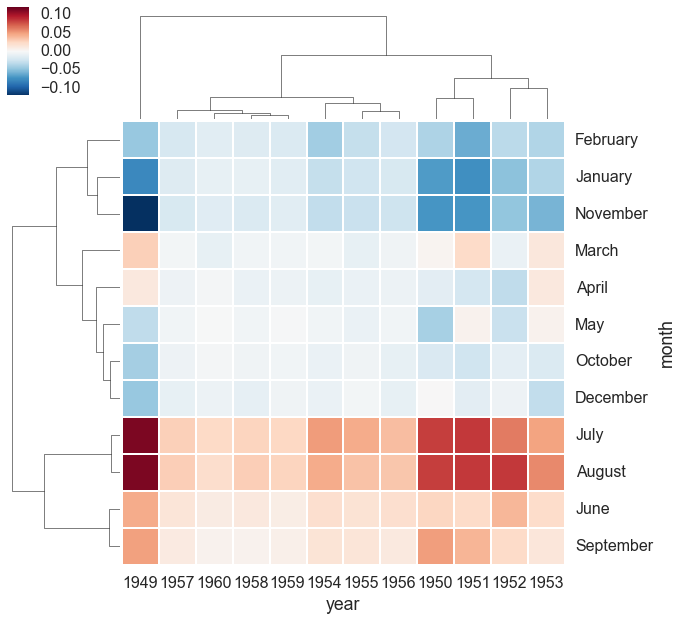

In [31]:
cg = sns.clustermap(flights_rect, z_score=1)

## Correlation plot

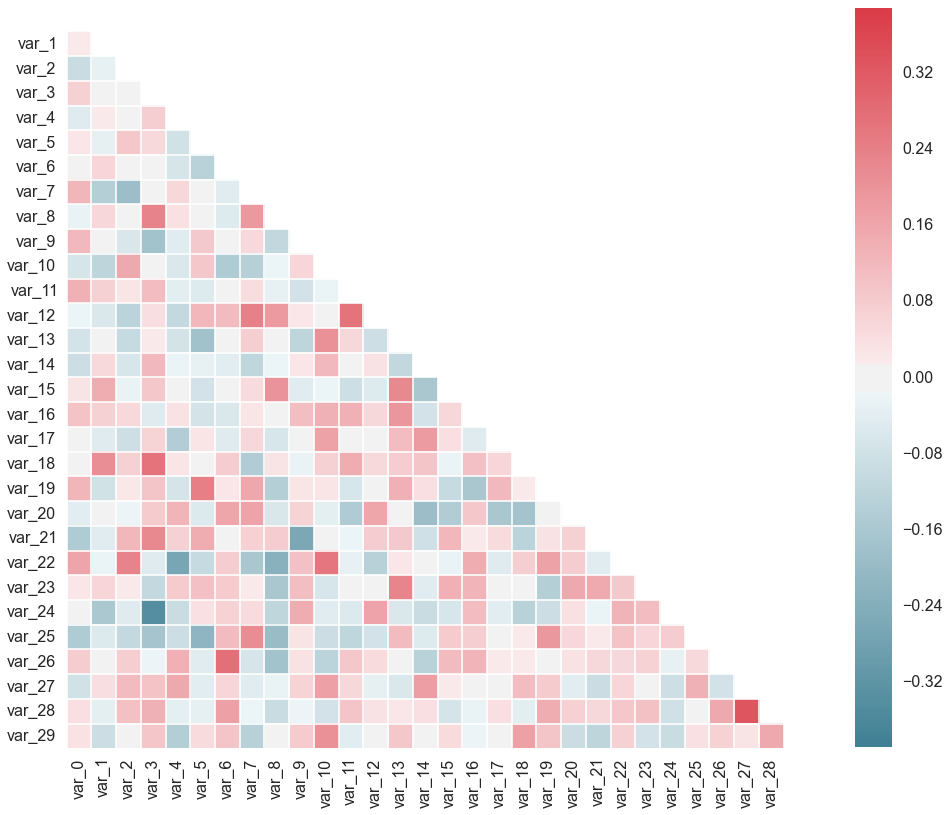

In [32]:
rs = np.random.RandomState(33)
d = rs.normal(size=(100, 30))

f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(d, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

## Multilinear Regression

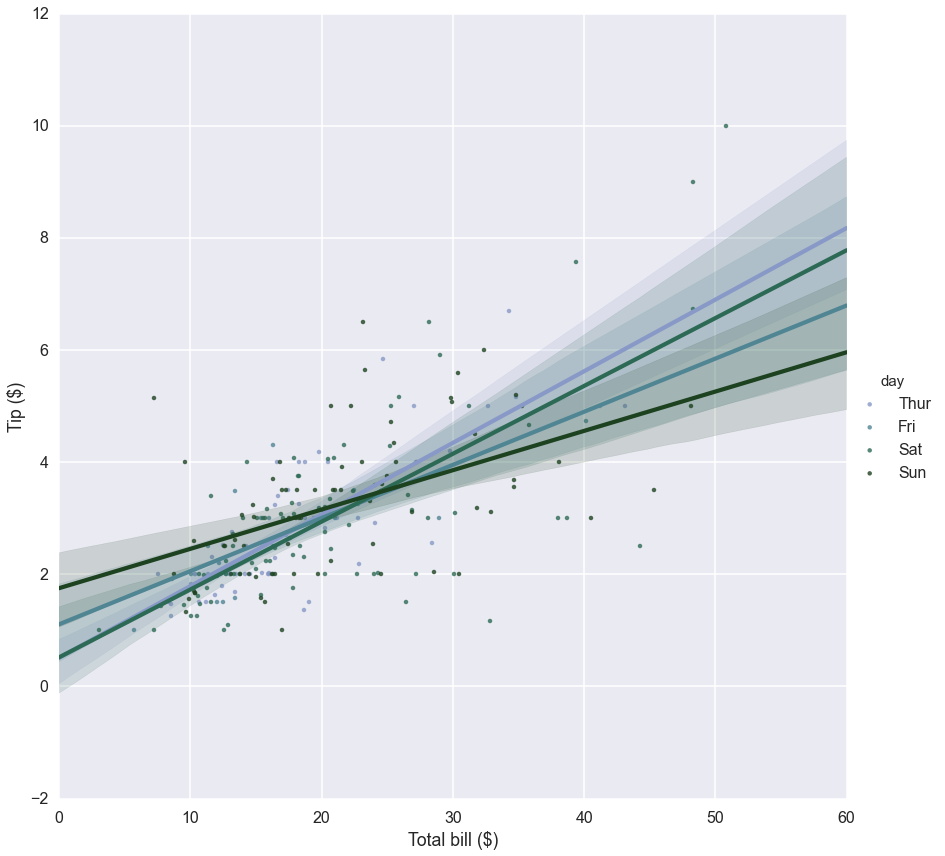

In [35]:
days = ["Thur", "Fri", "Sat", "Sun"]
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot("total_bill", "tip", hue="day", data=tips,
               hue_order=days, palette=pal, size=12)
g.set_axis_labels("Total bill ($)", "Tip ($)");